In [2]:
#
# plot vertical cross-section of zonal windspeed using ZL5 dataset
# see https://easy.gems.dkrz.de/Processing/healpix/index.html
#
%config InlineBackend.print_figure_kwargs = {"dpi": 72}
import healpy as hp
import intake
# for online
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["online"]
# for nowake
#cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["JAPAN"]
zd = cat.nicam_gl11(time="PT6H", zoom=6).to_dask()


/home/t-ohno/local/miniforge3/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [3]:
nt = zd.ua.time.shape[0]
ua = zd.ua.isel(time=nt-1) # zonal windspeed
ua

<xarray.DataArray 'ua' (lev: 25, cell: 49152)> Size: 5MB
[1228800 values with dtype=float32]
Coordinates:
  * lev      (lev) float64 200B 1e+03 975.0 950.0 925.0 ... 20.0 10.0 5.0 1.0
    time     datetime64[ns] 8B 2021-03-01
Dimensions without coordinates: cell
Attributes:
    grid_mapping:  healpix
    long_name:     velocity u
    units:         m/s

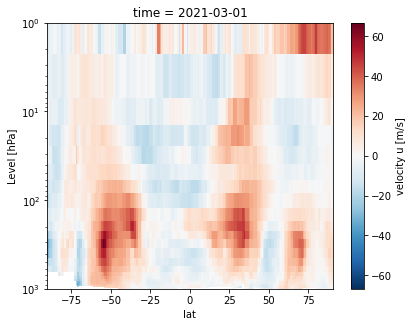

In [4]:
import numpy as np
import xarray as xr

lats = np.linspace(-90.0, 90.0, 180)
lons = np.full_like(lats, 0.0)

nside = zd.healpix.healpix_nside
flg_nested = zd.healpix.healpix_order == "nested"

pnts = xr.DataArray(
    hp.ang2pix(nside, lons, lats, lonlat=True, nest=flg_nested),
    dims=("cell",),
    coords={"lon": (("cell",), lons), "lat": (("cell",), lats)},
)

ua.isel(cell=pnts).swap_dims({"cell": "lat"}).plot(x="lat", yscale='log', ylim=[1.e3, 1.], )
